In [22]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

In [2]:
met_df = pd.read_pickle('metar_20190801_df.pkl')
met_df

,MetWindGust,Longitude,Latitude,Temperature,WindSpeed,WindDirection,Pressure
0,0.0,-110.85,31.42,297.05,0.0,0.0,101350.0
1,0.0,-110.96,32.13,300.35,2.6,170.0,101290.0
2,0.0,-111.17,32.14,299.15,2.1,70.0,0.0
3,0.0,-111.21,32.40,300.65,2.1,300.0,0.0
4,0.0,-116.98,32.57,290.95,1.5,0.0,101430.0
...,...,...,...,...,...,...,...
4389,0.0,-72.27,42.57,294.25,0.0,0.0,0.0
4390,0.0,-71.18,44.58,289.85,0.0,0.0,0.0
4391,0.0,-71.70,48.58,289.45,3.1,350.0,101660.0
4392,0.0,-73.34,49.28,284.85,0.0,0.0,101730.0


In [3]:
hrrr_df = pd.read_pickle('hrrr_20190801_df.pkl')
hrrr_df

,WindGust,Longitude,Latitude,Temperature,WindU,WindV,WindSpeed,PrecipRate
0,6.42368,-122.719528,21.138123,297.571167,-5.548723,-3.178455,6.248435,0.0
1,6.36118,-122.692861,21.145110,297.571167,-5.486223,-3.240955,6.248435,0.0
2,6.36118,-122.666190,21.152090,297.571167,-5.361223,-3.303455,6.185935,0.0
3,6.29868,-122.639515,21.159063,297.571167,-5.298723,-3.303455,6.123435,0.0
4,6.23618,-122.612835,21.166029,297.508667,-5.236223,-3.365955,6.060935,0.0
...,...,...,...,...,...,...,...,...
1905136,4.11118,-61.063480,47.883306,289.758667,-0.673723,1.446545,4.123435,0.0
1905137,4.23618,-61.026890,47.873043,289.758667,-0.798723,1.571545,4.248435,0.0
1905138,4.42368,-60.990312,47.862771,289.696167,-0.923723,1.634045,4.373435,0.0
1905139,4.48618,-60.953746,47.852488,289.633667,-1.048723,1.821545,4.498435,0.0


In [4]:
met_arr = met_df.to_numpy()
met_arr.shape

(4394, 7)

In [5]:
hrrr_arr = hrrr_df.to_numpy()
hrrr_arr.shape

(1905141, 8)

In [13]:
data1 = list(zip(met_arr[:,1], met_arr[:,2]))
met_tree = KDTree(data1)

In [14]:
data2 = list(zip(hrrr_arr[:,1], hrrr_arr[:,2]))
hrrr_tree = KDTree(data2)

In [24]:
indexes = met_tree.query_ball_tree(hrrr_tree, r=0.01)

Using this reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query_ball_tree.html

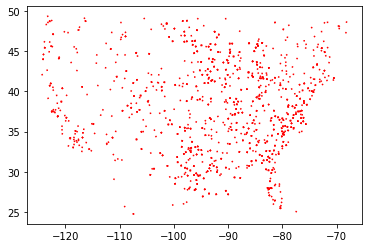

In [27]:
for i in range(len(indexes)):
    for j in indexes[i]:
        plt.plot([met_arr[i, 1], hrrr_arr[j, 1]],
            [met_arr[i, 2], hrrr_arr[j, 2]], "-r")
plt.show()